<a href="https://colab.research.google.com/github/Dagnne/TalentoTechDag/blob/main/Taller_preguntas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?


#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


In [63]:
# Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
ruta = '/content/drive/MyDrive/Analisis de Datos basico Talento Tech/dataset_banco.csv'
data = pd.read_csv(ruta) # La "ruta" se puede definir como ruta o path y los parentesis () no influyen para correr el codigo

# Taller preguntas

1. ¿Cual es la edad promedio de los clientes interesados en adquirir un certificado de deposito?

2. En una grafica, establece la diferencia de ingresos entre clientes interesados y no interesados en el certificado de deposito

3. En un grafico de barras, establece la distribucion de estado civil entre cliente interesados en el certificado de deposito

4. ¿Cual es el nivel educativo predominante entre clientes interesados en el certificado de deposito?

5. ¿Cual es la relacion entre estado civil vs el interes en adquirir el certificado de deposito?

6. ¿Cual es la distribucion del medio de contacto mas frecuente de los clientes interesados en adquirirel certificado de deposito?

7. En un grafico de barras horizontales, responde, ¿Cual es el tipo de ocupacion de los clientes interesados en adquirir el certificado de deposito?

8. ¿Cual es la frecuencia de contacto con los clientes interesados antes de la conversion?

9. Cual es el patron temporal en los contactos que conducen a una mayor conversion de clientes?

In [66]:
# ES IMPORTANTE DEFINIR LA(S) VARIABLE(S) QUE SE VA A UTILIZAR

yes_data = data[data['y']=='yes'] # Se debe definir la varieble yes_data para poder utilizarla mas adelante en otros comandos

In [67]:
# 1. Edad promedio de clientes interesados
edad_prom = data[data['y'] == 'yes']['age'].mean()
print("Edad promedio de clientes interesados:", edad_prom)

Edad promedio de clientes interesados: 41.80434782608695


### La edad promedio en clientes interesados en adquirir un certificado de deposito es de 42 años.

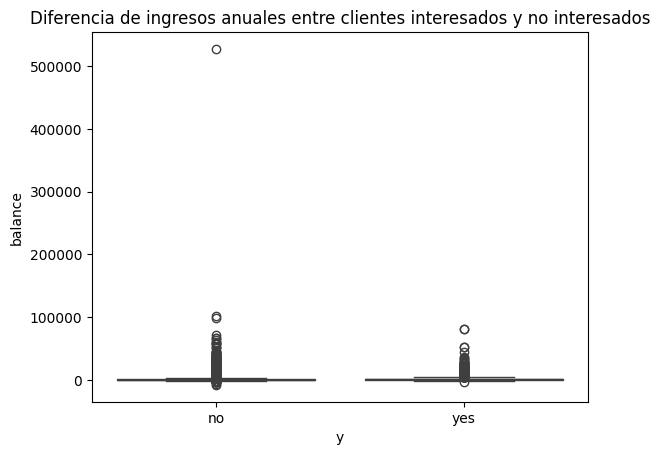

In [68]:
# 2. Diferencia de ingresos entre clientes interesados y no interesados

sns.boxplot(x='y', y='balance', data=data)
plt.title('Diferencia de ingresos anuales entre clientes interesados y no interesados')
plt.show()

Los clientes interesados en adquirir un certificado de deposito tienen saldo promedio anuales de hasta 90.000 euros, mientras que los clientes no interesados llegan a los 100.000 euros.

married     2755
single      1912
divorced     623
Name: marital, dtype: int64
Relacion entre estado civil e interesados


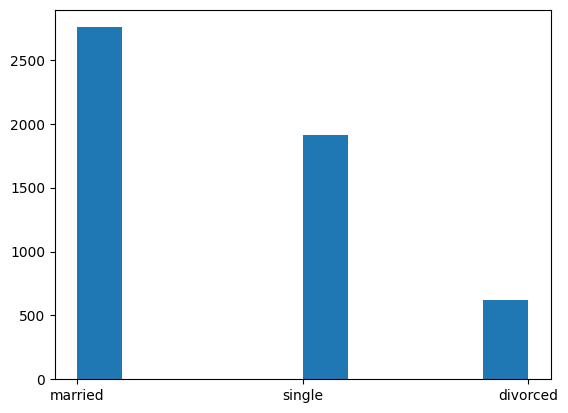

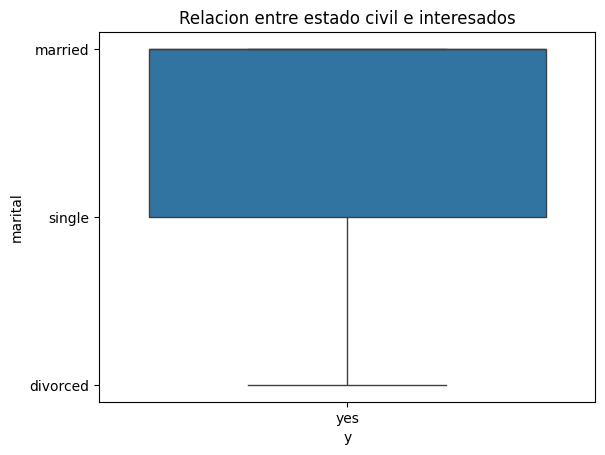

In [69]:
# 3. = 5. Distribucion y relacion de estado civil entre clientes interesados en el certificado de deposito
# (Se unificaron las preguntas 3 y 5)

count = data[data['y']== 'yes']['marital'].value_counts()
print(count)

print('Relacion entre estado civil e interesados')
data['marital'] = data['marital'].astype('str') # se debe convertir el tipo de datos (astype) de marital a string,
# para que el histograma se ejecute correctamente
plt.hist(data[data['y']=='yes']['marital'])
plt.show()

sns.boxplot(x='y', y='marital', data=yes_data) # Se debe colocar data=yes_data para que se muestren solamente los valores de los interesados
plt.title('Relacion entre estado civil e interesados')
plt.show()

Los clientes interesados en el certificado de deposito se distribuyen segun su estado civil de la siguiente manera:

Casados: 2.755
Solteros: 1912
Divorciados: 623

Lo que muestra que en su mayoria los mas interesados en adquirir el certificado de deposito son casados, seguidos de los solteros y por ultimo, pero no menos importantes, son divorciados. Datos que tambien se pueden apreciar en la grafica de bigotes que se encuentra anteriormente.

In [70]:
# education: unificar sec. y secondary, unk y unknown

print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
data.loc[data['education']=='primary','education'] = 'Primary'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK' nan]
['tertiary' 'secondary' 'unknown' 'Primary' 'SECONDARY' 'Secondary'
 'Tertiary' 'UNK' nan]


Nivel educativo predominante en interesados


<BarContainer object of 4 artists>

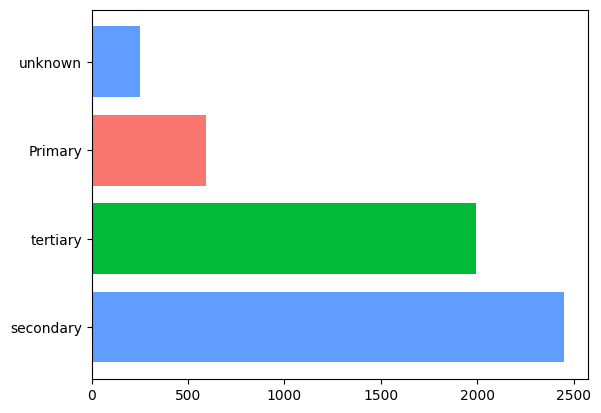

In [71]:
# 4. Nivel educativo predominante en interesados

print('Nivel educativo predominante en interesados')

# Datos
y = data[data['y']=='yes']['education'].value_counts()
x = y.index.to_list()
y = y.to_list()
colores = ["#619cff", "#00ba38", "#f8766d"] # Se puede hacer personalizacion del color

# Gráfico de barras
fig, ax = plt.subplots()
ax.barh(x, width = y, color=colores)

El nivel de educacion predominante en clientes interesados en adquirir un certificado de deposito es Secundaria y representan unos 2.400 clientes, aproximadamente; sin embargo, los clientes con educacion terciaria son 2.000, lo que tambien indica que no hay que descartarlos ni dejarlos de lado para la adquisicion del certificado.

In [72]:
# Eliminar filas con "age">100

print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'Tamaño del set despues de eliminar registros de edad:{data.shape}')

Tamaño del set antes de eliminar registros de edad: (45215, 17)
Tamaño del set despues de eliminar registros de edad:(45207, 17)


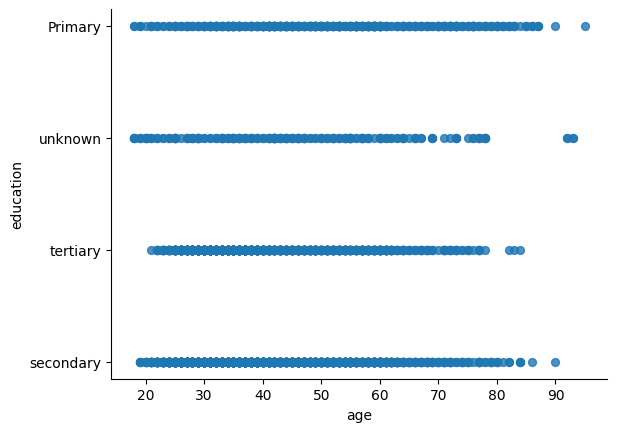

In [73]:
# Esta grafica nos muestra la relacion entre edad y nivel de educacion del los clientes interesados en el certificado de deposito
yes_data = data[data['y'] == 'yes'] # esta linea de codigo es la que define el subnivel
# de la categoria que se quiere visualizar especificamente, vs otras categorias
yes_data.plot(kind='scatter', x='age', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [74]:
# contact: unificar telephone y phone

print(data['contact'].unique())
data.loc[data['contact']=='phone', 'contact'] = 'Telephone'
data.loc[data['contact']=='mobile', 'contact'] = 'Cellular'
data.loc[data['contact']=='telephone', 'contact'] = 'Telephone'
data.loc[data['contact']=='cellular', 'contact'] = 'Cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'Cellular' 'Telephone']


Cellular     4370
unknown       530
Telephone     389
Name: contact, dtype: int64
Distribucion contacto mas frecuente de interesados


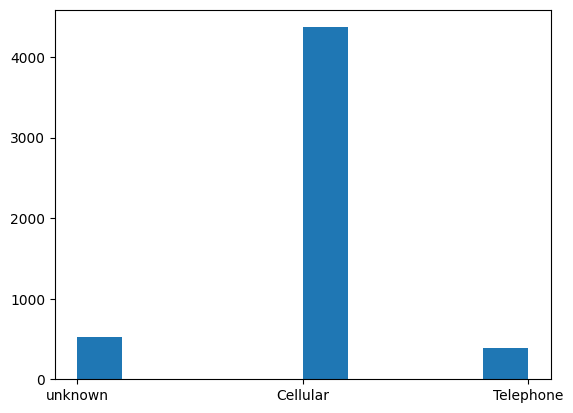

In [75]:
# 6. Distribucion contacto mas frecuente de interesados

count = data[data['y']== 'yes']['contact'].value_counts()
print(count)


print('Distribucion contacto mas frecuente de interesados')

data['contact'] = data['contact'].astype('str')
plt.hist(data[data['y']=='yes']['contact'])
plt.show()

Los clientes interesados en el certificado de deposito se distribuyen segun forma de contacto de la siguiente manera:

Celular: 4370

Desconocido: 530

Telephone: 389

El mayor medio de comunicacion a través del cual fue contactado cada cliente que esta interesado en el certificado de deposito fue por Celular.

management       1301
technician        841
blue-collar       707
admin.            631
retired           515
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: job, dtype: int64


<BarContainer object of 12 artists>

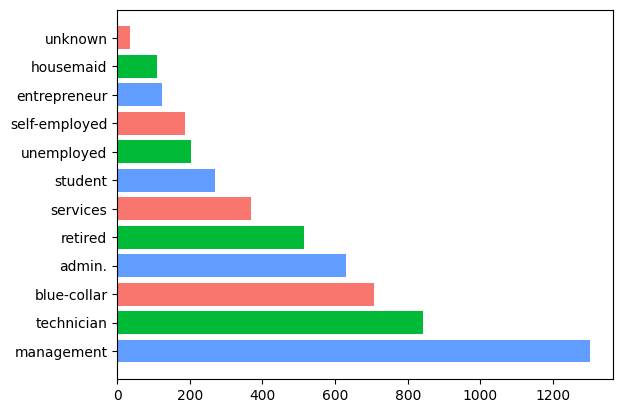

In [76]:
# 7. Ocupacion de clientes interesados

count = data[data['y']== 'yes']['job'].value_counts()
print(count)

# Datos
y = data[data['y']=='yes']['job'].value_counts()
x = y.index.to_list()
y = y.to_list()
colores = ["#619cff", "#00ba38", "#f8766d"]

# Gráfico de barras
fig, ax = plt.subplots()
ax.barh(x, width = y, color=colores)



La ocupacion que predomina entre los clientes interesados en el certificado de deposito es **Directivo con 1301 clientes**, seguido de **Tecnico con 841**; las demas ocupaciones se distribuyen de la siguiente manera:


Obrero                707

admin.                631

Jubilado              515

Servicios             369

Estudiante            269

Desempleado           202

Autonomo              187

Empresario            123

Empleada del hogar    109

Desconocido           34

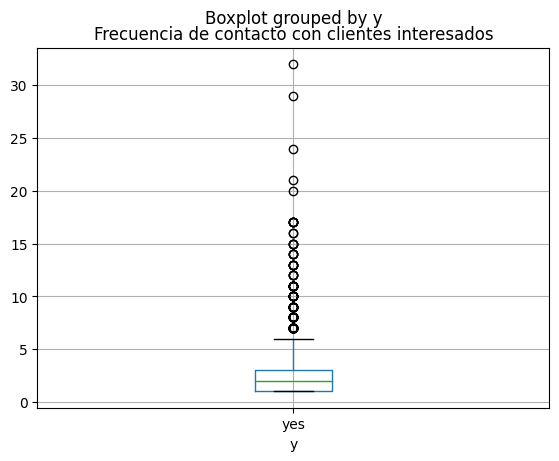

In [77]:
# 8. Frecuencia de contacto con clientes interesados (CAMPAIGN)

yes_data.boxplot(column='campaign', by='y')
plt.title('Frecuencia de contacto con clientes interesados')
plt.show()


La frecuencia expresada en la grafica de bigotes, muestra el número total de veces que fueron contactados los clientes iteresados en el certificado de deposito, durante la campaña; por lo tanto se aprecia que las personas fueron contactadas entre 1 y 3 veces en su mayoria, aunque, tambien fueron contactadas hasta 6 veces; sin embargo, algunas personas fueron contactadas hasta 33 veces. Sin embargo este ultimo valor no representa la mayoria y se podrian tomar como datos atipicos y pueden tratarse de datos erroneos en el proceso de digitacion de la informacion.

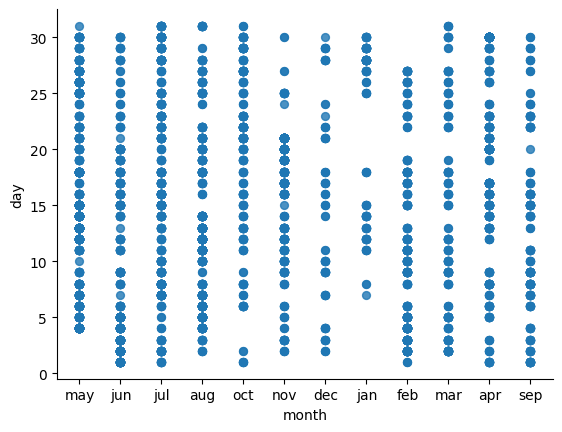

In [78]:
# 9. Patron temporal en contacto con mayor conversion de clientes
yes_data.plot(kind='scatter', x='month', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


En la grafica anterior se puede apreciar el ultimo dia y mes en que fue contactado el cliente y la conversion exitosa. en los meses de mayo, junio, julio y agosto hubo mayor conversion de clientes, en los meses de febrero, marzo, abril, septiembre y octubre hubo menor conversion de clientes que en los meses mencionados anteriormente y por ultimo en los meses de noviembre, diciembre y enero se presento la menor conversion de clientes.


